<a href="https://colab.research.google.com/github/aishuse/knn_svm_naive/blob/main/KNN_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Overview of K-Nearest Neighbors

The kNN algorithm can be considered a voting system, where the majority class label determines the class label of a new data point among its nearest ‘k’ (where k is an integer) neighbors in the feature space.


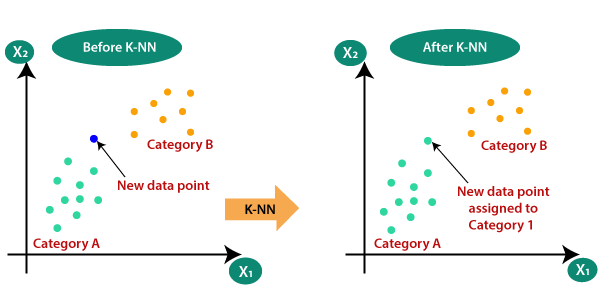

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/diabetics.csv')
df

Mounted at /content/gdrive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [ ]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [ ]:
df.shape

(768, 9)

# Data Preparation

***Find missing values***

In [ ]:
df.isna().sum()

Pregnancies                  6
Glucose                     11
BloodPressure                8
SkinThickness               20
Insulin                      6
BMI                         11
DiabetesPedigreeFunction     5
Age                          7
Outcome                      0
dtype: int64

***Handle missing values***

Replace all the missing data with the mean, median, or mode of the column

In [ ]:
df['Pregnancies'].fillna( df['Pregnancies'].median(), inplace = True )
df['Glucose'].fillna( df['Glucose'].mean(), inplace = True )
df['BloodPressure'].fillna( df['BloodPressure'].mean(), inplace = True )
df['SkinThickness'].fillna( df['SkinThickness'].mean(), inplace = True)
df['Insulin'].fillna( df['Insulin'].mean(), inplace = True )
df['BMI'].fillna( df['BMI'].mean(), inplace = True)
df['DiabetesPedigreeFunction'].fillna( df['DiabetesPedigreeFunction'].mean(), inplace= True)
df['Age'].fillna( df['Age'].median(), inplace = True )


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Seperation

***Seperate input and output from dataset***

In [ ]:
x = df.iloc[:,:-1].values              # [row, col]    : means full row    :-1 means except last col
x            # input

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y = df.iloc[:,-1].values
y             # output

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# Data Splitting

***Split the data set into two pieces — a training set and a testing set.***

Split the Dataset With scikit-learn's train_test_split(). Here, we use 70% of the data for training and 30% of the data for testing. The random_state is a pseudo-random number parameter that allows you to reproduce the same train test split each time you run the code.


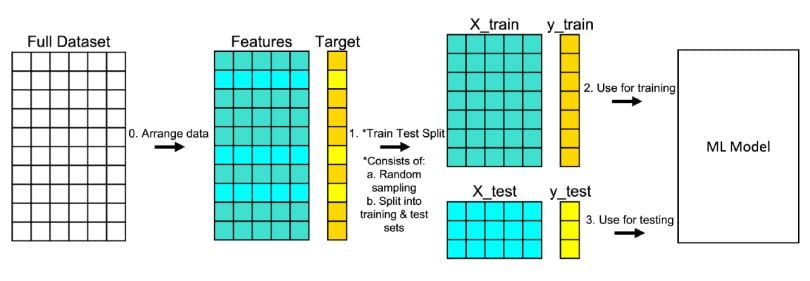

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x , y, test_size=0.30, random_state = 52)     # test_size = .3 ie, 30% data
x_train

array([[ 12.   , 151.   ,  70.   , ...,  41.8  ,   0.742,  38.   ],
       [  3.   , 158.   ,  70.   , ...,  35.5  ,   0.344,  35.   ],
       [  6.   , 154.   ,  74.   , ...,  29.3  ,   0.839,  39.   ],
       ...,
       [  4.   , 114.   ,  65.   , ...,  21.9  ,   0.432,  37.   ],
       [  3.   ,  87.   ,  60.   , ...,  21.8  ,   0.444,  21.   ],
       [  6.   ,  98.   ,  58.   , ...,  34.   ,   0.43 ,  43.   ]])

In [ ]:
x_test

array([[3.00e+00, 1.80e+02, 6.40e+01, ..., 3.40e+01, 2.71e-01, 2.60e+01],
       [3.00e+00, 9.90e+01, 8.00e+01, ..., 1.93e+01, 2.84e-01, 3.00e+01],
       [4.00e+00, 1.48e+02, 6.00e+01, ..., 3.09e+01, 1.50e-01, 2.90e+01],
       ...,
       [3.00e+00, 1.70e+02, 6.40e+01, ..., 3.45e+01, 3.56e-01, 3.00e+01],
       [2.00e+00, 1.14e+02, 6.80e+01, ..., 2.87e+01, 9.20e-02, 2.50e+01],
       [3.00e+00, 1.07e+02, 6.20e+01, ..., 2.29e+01, 6.78e-01, 2.30e+01]])

In [ ]:
y_train

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

# Data Normalization

***Normalization technique used - standard scalar***

**z = (x-u)/s ***  

x is mean of training data

u is exact value

s is std deviation of training data

Feature scaling is a common preprocessing step in machine learning to ensure that all features have the same scale.


In [ ]:
from sklearn.preprocessing import StandardScaler    # another one - MinMaxScalar
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)      # fit and transform can be together performed. scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)


# Model creation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

# Performance Evaluation

To evaluate the performance of K-nearest neighbors (KNN) classifier, we can use various metrics such as accuracy score, a confusion matrix, and a classification report.

accuracy_score =  0.7272727272727273

 confusion_matrix 
 [[128  27]
 [ 36  40]]

 classification_report 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       155
           1       0.60      0.53      0.56        76

    accuracy                           0.73       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.72      0.73      0.72       231



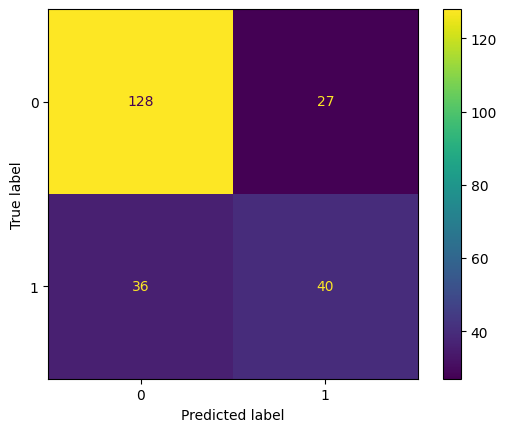

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

label = [ 0, 1 ]
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = label)

print("accuracy_score = ", accuracy_score(y_test, y_pred))
print("\n confusion_matrix \n", confusion_matrix(y_test, y_pred))
print("\n classification_report \n", classification_report(y_test, y_pred))

cmd.plot()

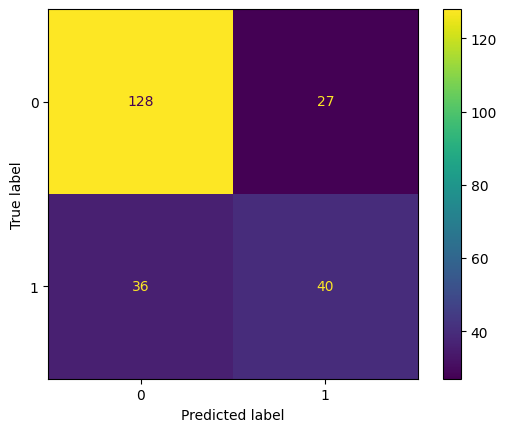

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

**Accuracy Score:** The accuracy score is 0.727, which means that the model correctly predicted the class labels for approximately 72.73% of the samples in the test dataset.

**Confusion Matrix:**

True Positive (TP): 40

True Negative (TN): 128

False Positive (FP): 27

False Negative (FN): 36

The confusion matrix provides a breakdown of correct and incorrect predictions. In this case, it shows that the model correctly predicted 40 instances of class 1 (diabetes), and 128 instances of class 0 (non-diabetes), but it made 27 false positive and 36 false negative predictions.

**Classification Report:**

Precision for class 0 (non-diabetes) is 0.78, and for class 1 (diabetes) is 0.60. Precision measures the ratio of true positives to the total number of predicted positives.
Recall for class 0 is 0.83, and for class 1 is 0.53. Recall measures the ratio of true positives to the total number of actual positives.
F1-Score for class 0 is 0.80, and for class 1 is 0.56. The F1-Score is the harmonic mean of precision and recall, providing a balance between the two.
Support represents the number of samples in each class.
The classification report provides a more detailed summary of the model's performance, including precision, recall, and F1-Score for both classes.

In summary, this model has an accuracy of approximately 72.73%. It performs reasonably well in terms of precision and recall for class 0 (non-diabetes), but it has room for improvement in precision and recall for class 1 (diabetes).

# Testing


Let's use our trained K-nearest neighbors (KNN) classifier to make predictions for a new data point.

In [ ]:
knn.predict([[3,110,70,32,0,30.7,0.10,40]])

array([1])

In [ ]:
knn.predict(scalar.transform([[3,110,70,32,0,30.7,0.10,40]]))

array([0])

The prediction suggests that the new data point is classified as belonging to class 1, which corresponds to the **diabetic** class.